<a href="https://colab.research.google.com/github/minji-sung/pythonlab/blob/main/20_Machine%20Learning%202_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 농어

In [ ]:
# 데이터 준비 (농어)
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

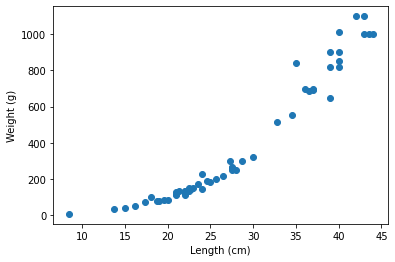

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

In [ ]:
# generating train and test set

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [ ]:
train_input.shape   #scikit learn 하려면 2차원 구조의 numpy array 여야해

(42,)

In [ ]:
#행렬이 있는 구조로 바꿔주자
#reshape method 로 하면 된다!
# 몇행 몇열인지 써줘야 한대 -> 그게 (-1, 1)

train_input = train_input.reshape(-1, 1)    #-1:전체 데이터 개수
test_input = test_input.reshape(-1, 1)

In [ ]:
train_input.shape

(42, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knr.score(test_input, test_target)

0.9928094061010639

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

In [ ]:
knr.score(train_input, train_target)

0.9698823289099255

In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.974645996398761


## k 초근접 이웃 회귀 정리

In [ ]:
# train, test set
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
# sklearn 의 입력값은 2차원 배열이어야 해서

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
knr.predict([[50]])

array([1033.33333333])

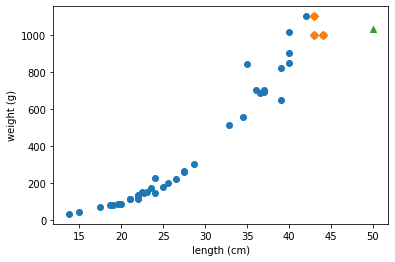

In [ ]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033, marker = '^')
plt.xlabel('length (cm)')
plt.ylabel('weight (g)')
plt.show()

## linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
lr.predict([[50]])

array([1241.83860323])

In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


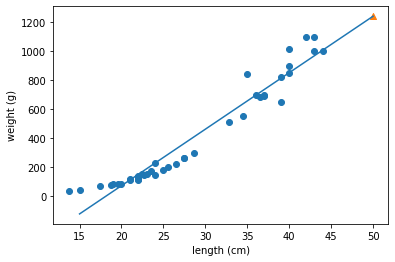

In [ ]:
#y = 39.01x -709

plt.scatter(train_input, train_target)
plt.scatter(50, 1241.8, marker = '^')
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_] )
plt.xlabel('length (cm)')
plt.ylabel('weight (g)')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


## Multiple linear regression

## Boston real estate price data

In [ ]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston_dataset.data.shape

(506, 13)

In [ ]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston_dataset.target #집값

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:

boston_dataset.target.shape

(506,)

In [ ]:
# generating a dataframe

import pandas as pd

x = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [ ]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y = pd.DataFrame(boston_dataset.target, columns = ['MEDV'])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# random_state = 5 (train_test_split 함수에서)
# test_size = 0.2


## AGE-MEDV


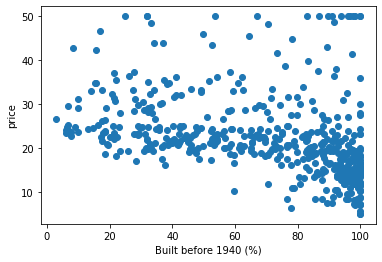

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[['AGE']], y)
plt.xlabel('Built before 1940 (%)')
plt.ylabel('price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(x[['AGE']], y, test_size=0.2, random_state=5)

In [ ]:
#train_input.shape

In [ ]:
#train_input = pd.Series(train_input).array
#train_input

In [ ]:
#train_input.shape

In [ ]:
#train_input = train_input.to_numpy(dtype=float)


In [ ]:
#test_input = pd.Series(test_input).array
#test_input = test_input.to_numpy(dtype=float)

In [ ]:
#test_input.shape

In [ ]:
#행렬이 있는 구조로 바꿔주자
#reshape method 로 하면 된다!
# 몇행 몇열인지 써줘야 한대 -> 그게 (-1, 1)

#train_input = train_input.reshape(-1, 1)    #-1:전체 데이터 개수
#test_input = test_input.reshape(-1, 1)

In [ ]:
#train_input.shape

In [ ]:
#test_input.shape

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
lr.predict([[50]])

array([[24.84473267]])

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.12402883]] [31.04617413]


In [ ]:
lr.coef_

array([[-0.12402883]])

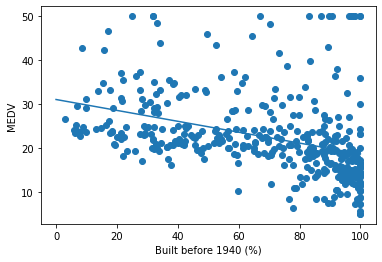

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([0,100],[0*lr.coef_[0]+ lr.intercept_[0], 100*lr.coef_[0]+lr.intercept_[0]])
plt.xlabel('Built before 1940 (%)')
plt.ylabel('MEDV')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.143432785607861
0.1334414836868656


In [ ]:
test_pred = lr.predict(test_input)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = mean_squared_error(test_target, test_pred)**0.5
rms

8.236881612652455

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction=lr.predict(test_input)

mae=mean_absolute_error(test_target, test_prediction)
mae

5.635470082154911

# CRIM - MEDV

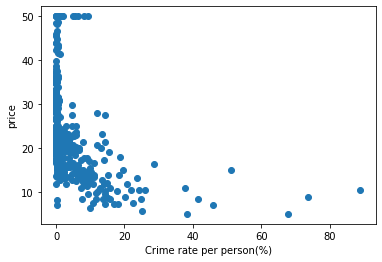

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[['CRIM']], y)
plt.xlabel('Crime rate per person(%)')
plt.ylabel('price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(x[['CRIM']], y, test_size=0.2, random_state=5)

In [ ]:
#train_input = pd.Series(train_input).array
#train_input = train_input.to_numpy(dtype=float)

#test_input = pd.Series(test_input).array
#test_input = test_input.to_numpy(dtype=float)

In [ ]:
#train_input = train_input.reshape(-1, 1)    #-1:전체 데이터 개수
#test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
lr.predict([[50]])

array([[3.34874845]])

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.41546547]] [24.12202188]


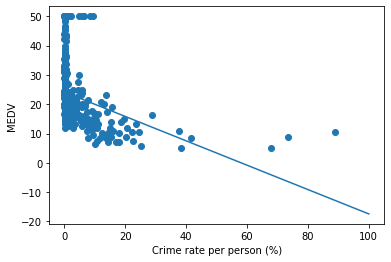

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([0,100],[0*lr.coef_[0]+ lr.intercept_[0], 100*lr.coef_[0]+lr.intercept_[0]])
plt.xlabel('Crime rate per person (%)')
plt.ylabel('MEDV')
plt.show()

In [ ]:
x['AGE']    #series

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [ ]:
x[['AGE']]  #data frame

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.15130948174423686
0.14522288591819743


In [ ]:
test_pred = lr.predict(test_input)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test_target, test_pred))
rms

8.236881612652455

# Lecture (20210715)

In [ ]:
x_age = x[['AGE']]
x_age

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_age, y, test_size=0.2, random_state=5)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train) #fit 으로 학습시키기

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([[-0.12402883]])

In [ ]:
model.intercept_

array([31.04617413])

In [ ]:
# y = -0.12x + 31.04


In [ ]:
y_test_pred = model.predict(x_test)
y_test_pred

In [ ]:
# y_test_pred 가지고 손실함수 찾는거야 MSE 가지고
from sklearn.metrics import mean_squared_error
from math import sqrt

#y_test 하려고 빼놓은 값과 prediction 값이랑 비교하기
rms = sqrt(mean_squared_error(y_test, y_test_pred)) 
rms

8.236881612652455